<a href="https://colab.research.google.com/github/karojg/pandas-colaboratory/blob/main/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [15]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [20]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
df = pd.DataFrame(df)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [47]:
print(df.head())
print(df.tail())

           DATE     TAG  POSTS
2421 2023-02-01     php   2582
2422 2023-02-01  python  16262
2423 2023-02-01       r   3851
2424 2023-02-01    ruby    343
2425 2023-02-01   swift   1337


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [40]:
columns_quantity = len(df.columns)
dimensions = df.shape
print(columns_quantity, dimensions)

3 (2426, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [27]:
entries_quantity = df.count()
print(entries_quantity)

DATE     2426
TAG      2426
POSTS    2426
dtype: int64


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [44]:
post_per_language_sum = df.groupby("TAG").sum()
post_per_language_count = df.groupby("TAG").sum()
print(post_per_language_sum, post_per_language_count)

              POSTS
TAG                
assembly      42291
c            393347
c#          1581543
c++          788605
delphi        50579
go            67739
java        1886654
javascript  2474719
perl          67514
php         1454387
python      2105196
r            481993
ruby         227335
swift        324531               POSTS
TAG                
assembly      42291
c            393347
c#          1581543
c++          788605
delphi        50579
go            67739
java        1886654
javascript  2474719
perl          67514
php         1454387
python      2105196
r            481993
ruby         227335
swift        324531


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [50]:
print(df['DATE'][1])

2008-08-01 00:00:00
        DATE       TAG  POSTS
0 2008-07-01        c#      3
1 2008-08-01  assembly      8
2 2008-08-01         c     83
3 2008-08-01        c#    505
4 2008-08-01       c++    164


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [46]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [58]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,242.0,2005.0,5792.0,3195.0,153.0,738.0,6474.0,14058.0,82.0,3360.0,22027.0,4527.0,436.0,1621.0
2022-11-01,289.0,2185.0,6036.0,3304.0,116.0,750.0,6797.0,14357.0,110.0,3362.0,22884.0,4628.0,466.0,1674.0
2022-12-01,284.0,1865.0,5345.0,2866.0,86.0,632.0,5987.0,12560.0,95.0,2895.0,19344.0,3688.0,395.0,1469.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [52]:
reshaped_df.shape

(176, 14)

In [ ]:
print(reshaped_df.head())
print(reshaped_df.tail())

In [59]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')
TAG
assembly      175
c             175
c#            176
c++           175
delphi        175
go            160
java          175
javascript    175
perl          175
php           175
python        175
r             173
ruby          175
swift         167
dtype: int64


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
print(reshaped_df.count())

In [64]:
reshaped_df.fillna(0, inplace=True) 

In [65]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1642.0,754.0,104.0,0.0,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1730.0,734.0,141.0,0.0,956.0,580.0,97.0,500.0,450.0,1.0,158.0,0.0


In [66]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [71]:
import matplotlib.pyplot as plt

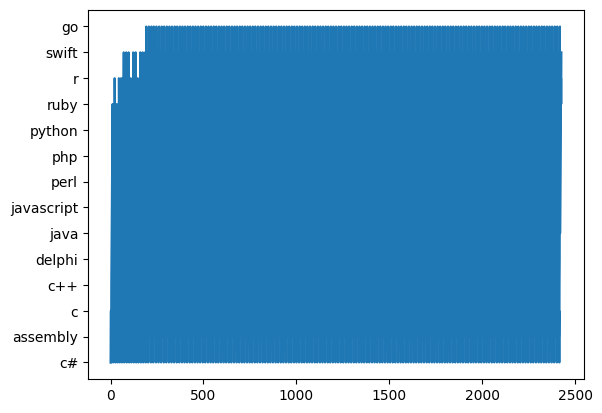

In [92]:
plt.plot(df.index, df['TAG'])

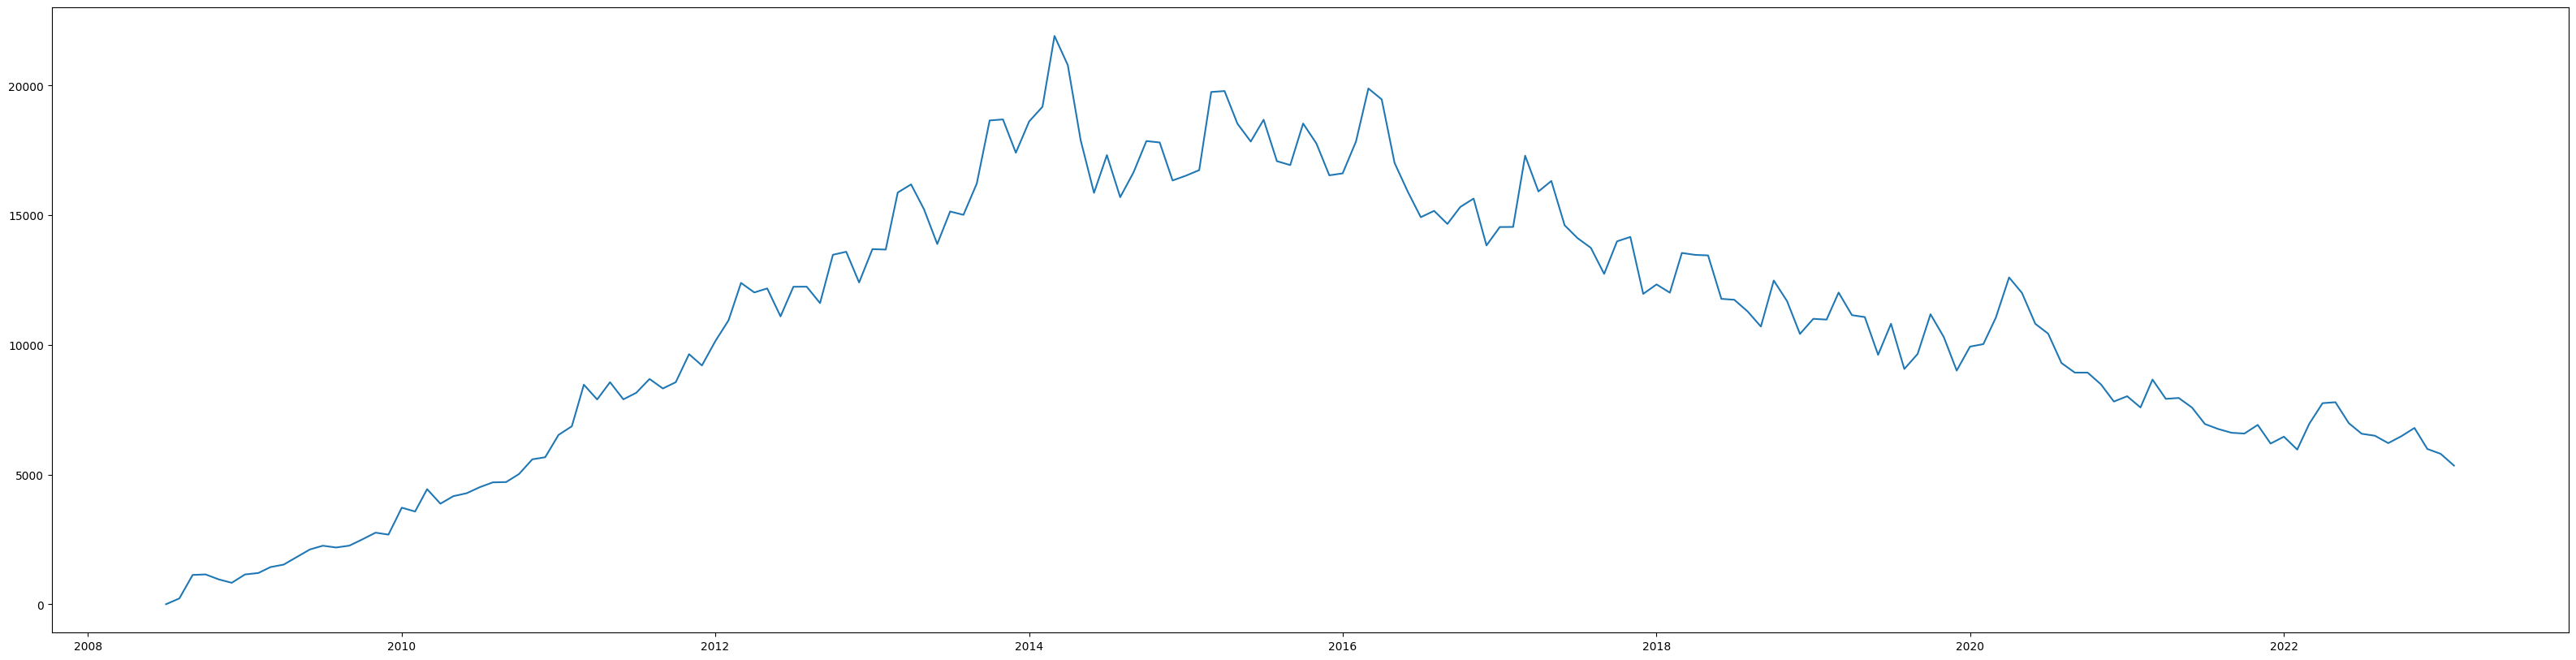

In [96]:
plt.figure(figsize=(40,10)) 
plt.plot(reshaped_df.index, reshaped_df["java"])

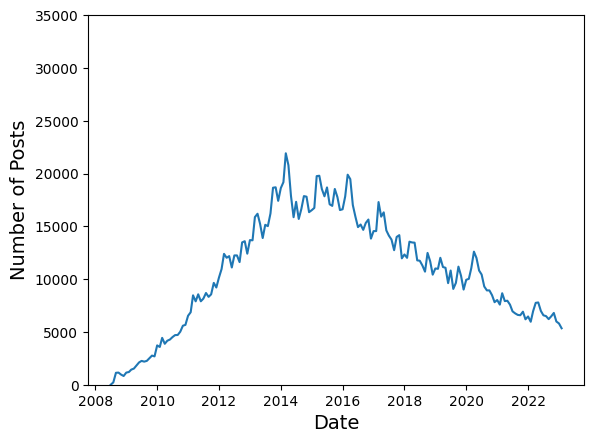

In [99]:
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df["java"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

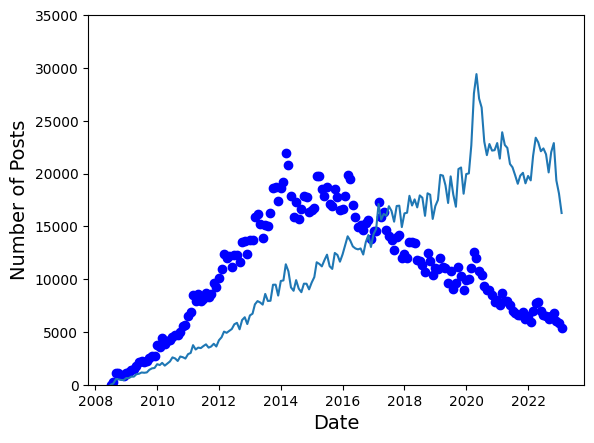

In [106]:
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df["java"],'bo')
plt.plot(reshaped_df.index, reshaped_df["python"])

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 